# take clean data and process for exploration and ML predictions

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('processed_ranks.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rank       350 non-null    object 
 1   name       350 non-null    object 
 2   pob        350 non-null    object 
 3   birthdate  350 non-null    object 
 4   height     350 non-null    float64
 5   weight     350 non-null    float64
 6   year       350 non-null    int64  
 7   month      350 non-null    int64  
 8   win        350 non-null    int64  
 9   loss       350 non-null    int64  
 10  absent     350 non-null    int64  
 11  next_rank  266 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 32.9+ KB


In [5]:
df.head()

,rank,name,pob,birthdate,height,weight,year,month,win,loss,absent,next_rank
0,K1e,Abi,Saitama,04.05.1994,185.0,121.0,2020,1,5,10,0,M4w
1,M4w,Abi,Saitama,04.05.1994,185.0,121.0,2020,3,7,8,0,M5e
2,M5e,Abi,Saitama,04.05.1994,185.0,121.0,2020,7,3,4,8,M14w
3,M14w,Abi,Saitama,04.05.1994,185.0,121.0,2020,9,0,0,15,J11w
4,J11w,Abi,Saitama,04.05.1994,185.0,121.0,2020,11,0,0,15,NaN


# process ranks

ranks are a mix of categorical and numerical
- Y > O > S > K > M > J
- 1 > 2 > 3 > 4 ...
- E > W

In [6]:
def east_west(df_rank):
    """
    turn east west into binary
    """
    
    df_is_east = df_rank.str.contains('e')
    
    return df_is_east

east_west(df['rank'])
df['is_east'] = east_west(df['rank'])
df['next_is_east'] = east_west(df['next_rank'])
df.head()

,rank,name,pob,birthdate,height,weight,year,month,win,loss,absent,next_rank,is_east,next_is_east
0,K1e,Abi,Saitama,04.05.1994,185.0,121.0,2020,1,5,10,0,M4w,True,False
1,M4w,Abi,Saitama,04.05.1994,185.0,121.0,2020,3,7,8,0,M5e,False,True
2,M5e,Abi,Saitama,04.05.1994,185.0,121.0,2020,7,3,4,8,M14w,True,False
3,M14w,Abi,Saitama,04.05.1994,185.0,121.0,2020,9,0,0,15,J11w,False,False
4,J11w,Abi,Saitama,04.05.1994,185.0,121.0,2020,11,0,0,15,NaN,False,NaN


In [7]:
df['rank'].str[0]

0      K
1      M
2      M
3      M
4      J
      ..
345    M
346    M
347    M
348    M
349    M
Name: rank, Length: 350, dtype: object

In [8]:
def tier_rank(df_rank):
    """
    return ordinal ranks for Y, O, S, K, M, J
    """
    
    df_tier = df_rank.str[0]
    mapper = {
        'Y': 1,
        'O': 2,
        'S': 3,
        'K': 4,
        'M': 5,
        'J': 6
    }
    
    df_tier = df_tier.replace(mapper)
    
    return df_tier

df['tier_rank'] = tier_rank(df['rank'])
df['next_tier_rank'] = tier_rank(df['next_rank'])
df.head()

,rank,name,pob,birthdate,height,weight,year,month,win,loss,absent,next_rank,is_east,next_is_east,tier_rank,next_tier_rank
0,K1e,Abi,Saitama,04.05.1994,185.0,121.0,2020,1,5,10,0,M4w,True,False,4,5.0
1,M4w,Abi,Saitama,04.05.1994,185.0,121.0,2020,3,7,8,0,M5e,False,True,5,5.0
2,M5e,Abi,Saitama,04.05.1994,185.0,121.0,2020,7,3,4,8,M14w,True,False,5,5.0
3,M14w,Abi,Saitama,04.05.1994,185.0,121.0,2020,9,0,0,15,J11w,False,False,5,6.0
4,J11w,Abi,Saitama,04.05.1994,185.0,121.0,2020,11,0,0,15,NaN,False,NaN,6,NaN


In [9]:
def numerical_rank(df_rank):
    """
    take rank and extract numerical rank
    """
    
    df_num = df_rank.str.extract(r'(\d+)').astype('float')
    
    return df_num

df['num_rank'] = numerical_rank(df['rank'])
df['next_num_rank'] = numerical_rank(df['next_rank'])
df.head()

,rank,name,pob,birthdate,height,weight,year,month,win,loss,absent,next_rank,is_east,next_is_east,tier_rank,next_tier_rank,num_rank,next_num_rank
0,K1e,Abi,Saitama,04.05.1994,185.0,121.0,2020,1,5,10,0,M4w,True,False,4,5.0,1.0,4.0
1,M4w,Abi,Saitama,04.05.1994,185.0,121.0,2020,3,7,8,0,M5e,False,True,5,5.0,4.0,5.0
2,M5e,Abi,Saitama,04.05.1994,185.0,121.0,2020,7,3,4,8,M14w,True,False,5,5.0,5.0,14.0
3,M14w,Abi,Saitama,04.05.1994,185.0,121.0,2020,9,0,0,15,J11w,False,False,5,6.0,14.0,11.0
4,J11w,Abi,Saitama,04.05.1994,185.0,121.0,2020,11,0,0,15,NaN,False,NaN,6,NaN,11.0,NaN


# plot current rank vs next rank

## create lost / won flag

In [10]:
df['make_koshi'] = df['win'] >= 8
df.head()

,rank,name,pob,birthdate,height,weight,year,month,win,loss,absent,next_rank,is_east,next_is_east,tier_rank,next_tier_rank,num_rank,next_num_rank,make_koshi
0,K1e,Abi,Saitama,04.05.1994,185.0,121.0,2020,1,5,10,0,M4w,True,False,4,5.0,1.0,4.0,False
1,M4w,Abi,Saitama,04.05.1994,185.0,121.0,2020,3,7,8,0,M5e,False,True,5,5.0,4.0,5.0,False
2,M5e,Abi,Saitama,04.05.1994,185.0,121.0,2020,7,3,4,8,M14w,True,False,5,5.0,5.0,14.0,False
3,M14w,Abi,Saitama,04.05.1994,185.0,121.0,2020,9,0,0,15,J11w,False,False,5,6.0,14.0,11.0,False
4,J11w,Abi,Saitama,04.05.1994,185.0,121.0,2020,11,0,0,15,NaN,False,NaN,6,NaN,11.0,NaN,False


## Finding one
Interestingly there is a higher probability of moving to "east" rank than "west"  when losing, but not when winning
- this is most likely due to "east" filling first

make_koshi  next_is_east
False       True            0.528986
            False           0.471014
True        False           0.500000
            True            0.500000
Name: next_is_east, dtype: float64


<AxesSubplot:xlabel='make_koshi,next_is_east'>

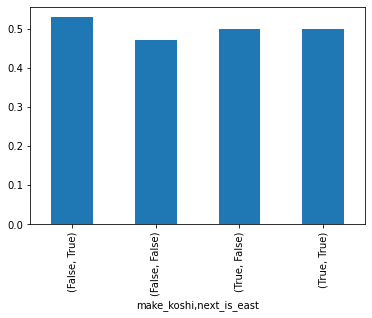

In [11]:
# current basho vs next bash
grouper = ['make_koshi']
print(df.groupby(grouper)['next_is_east'].value_counts(normalize = True))
df.groupby(grouper)['next_is_east'].value_counts(normalize = True).plot.bar()

# Exploration 2
does winning or losing have an effect on increasing numerical rank

In [12]:
df['num_rank_diff'] = df['num_rank'] - df['next_num_rank'] 

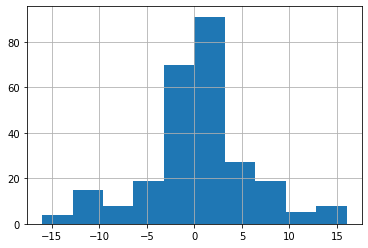

In [13]:
df['num_rank_diff'].hist();

<AxesSubplot:xlabel='num_rank_diff'>

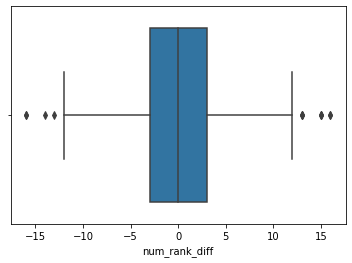

In [14]:
kwargs = {
    'x': df['num_rank_diff']
}
sns.boxplot(**kwargs)

<AxesSubplot:xlabel='num_rank_diff', ylabel='make_koshi'>

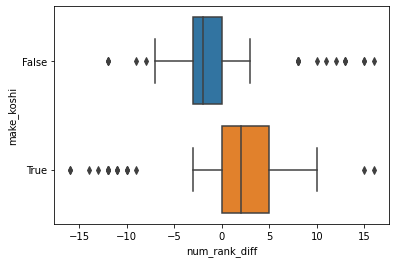

In [15]:
kwargs = {
    'x': df['num_rank_diff'],
    'y': df['make_koshi'].astype('category')
}
sns.boxplot(**kwargs)

In [16]:
grouper = ['make_koshi', 'tier_rank']
df.groupby(grouper)['num_rank_diff'].describe()

count      mean       std   min    25%  50%   75%   max
make_koshi tier_rank                                                         
False      1            5.0  0.000000  0.000000   0.0   0.00  0.0  0.00   0.0
           2            1.0  0.000000       NaN   0.0   0.00  0.0  0.00   0.0
           3            2.0  0.000000  0.000000   0.0   0.00  0.0  0.00   0.0
           4            6.0 -2.500000  2.345208  -6.0  -3.75 -2.5 -0.50   0.0
           5           77.0  0.012987  6.114034 -12.0  -3.00 -2.0  0.00  16.0
           6           47.0 -2.531915  2.561004 -12.0  -3.00 -2.0 -1.00   1.0
True       1            3.0  0.000000  0.000000   0.0   0.00  0.0  0.00   0.0
           2            5.0  0.000000  0.000000   0.0   0.00  0.0  0.00   0.0
           3            7.0 -0.142857  0.377964  -1.0   0.00  0.0  0.00   0.0
           4            2.0 -0.500000  0.707107  -1.0  -0.75 -0.5 -0.25   0.0
           5           59.0  4.237288  3.234187   0.0   2.00  3.0  6.00  16.0
           6           52.0 -1.442308  7.764710 -16.0 -10.25  2.0  4.25  10.0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            350 non-null    object 
 1   name            350 non-null    object 
 2   pob             350 non-null    object 
 3   birthdate       350 non-null    object 
 4   height          350 non-null    float64
 5   weight          350 non-null    float64
 6   year            350 non-null    int64  
 7   month           350 non-null    int64  
 8   win             350 non-null    int64  
 9   loss            350 non-null    int64  
 10  absent          350 non-null    int64  
 11  next_rank       266 non-null    object 
 12  is_east         350 non-null    bool   
 13  next_is_east    266 non-null    object 
 14  tier_rank       350 non-null    int64  
 15  next_tier_rank  266 non-null    float64
 16  num_rank        350 non-null    float64
 17  next_num_rank   266 non-null    flo

# predictions to make
east vs west - binary classification
numerical rank - linear regression (non linear options)
tier rank - multi-class classification

# alternative - calculate single rank per tournament (1 through end) then predict rank changethat way


# alternative rank
- calculate absolute rank with the following rules
    - Y>O>S>K>M>J
    - num rank 
    - east > west

In [18]:
def abs_rank(df):
    """
    order and rank results to get absoulte rank
    """
    
    cols = ['year','month','tier_rank', 'num_rank', 'is_east']
    rf = df.sort_values(by = cols, ascending = [True, True, True, True, False],ignore_index = True)

    rf['order'] = rf.index
    rf['abs_rank']= rf.groupby(['year','month'])['order'].rank()
    
    return rf

sf = abs_rank(df)
to_check = (sf.year == 2020) & ( sf.month == 3)
sf[to_check].head(5)

,rank,name,pob,birthdate,height,weight,year,month,win,loss,...,is_east,next_is_east,tier_rank,next_tier_rank,num_rank,next_num_rank,make_koshi,num_rank_diff,order,abs_rank
70,Y1e,Hakuho,Mongolia,11.03.1985,193.0,150.7,2020,3,13,2,...,True,True,1,1.0,1.0,1.0,True,0.0,70,1.0
71,Y1wYO,Kakuryu,Mongolia,10.08.1985,186.0,150.0,2020,3,12,3,...,False,False,1,1.0,1.0,1.0,True,0.0,71,2.0
72,O1e,Takakeisho,Hyogo,05.08.1996,173.0,149.0,2020,3,7,8,...,True,True,2,2.0,1.0,1.0,False,0.0,72,3.0
73,S1e,Asanoyama,Toyama,01.03.1994,189.0,158.0,2020,3,11,4,...,True,False,3,2.0,1.0,1.0,True,0.0,73,4.0
74,S1w,Shodai,Kumamoto,05.11.1991,182.0,150.0,2020,3,8,7,...,False,True,3,3.0,1.0,1.0,True,0.0,74,5.0


In [19]:
def abs_next_rank(df):
    """
    order and rank results to get absoulte rank
    """
    
    cols = ['year','month','next_tier_rank', 'next_num_rank', 'next_is_east']
    rf = df.sort_values(by = cols, ascending = [True, True, True, True, False],ignore_index = True)
    rf['next_order'] = rf.index
    where = rf.next_rank.isna()
    rf.loc[where, 'next_order'] = np.nan
    rf['next_abs_rank'] = rf.groupby(['year','month'])['next_order'].rank()
    
    return rf

sf = abs_next_rank(sf)
to_check = (sf.year == 2020) & ( sf.month == 3)
sf[to_check].head(5)

,rank,name,pob,birthdate,height,weight,year,month,win,loss,...,tier_rank,next_tier_rank,num_rank,next_num_rank,make_koshi,num_rank_diff,order,abs_rank,next_order,next_abs_rank
70,Y1e,Hakuho,Mongolia,11.03.1985,193.0,150.7,2020,3,13,2,...,1,1.0,1.0,1.0,True,0.0,70,1.0,70.0,1.0
71,Y1wYO,Kakuryu,Mongolia,10.08.1985,186.0,150.0,2020,3,12,3,...,1,1.0,1.0,1.0,True,0.0,71,2.0,71.0,2.0
72,O1e,Takakeisho,Hyogo,05.08.1996,173.0,149.0,2020,3,7,8,...,2,2.0,1.0,1.0,False,0.0,72,3.0,72.0,3.0
73,S1e,Asanoyama,Toyama,01.03.1994,189.0,158.0,2020,3,11,4,...,3,2.0,1.0,1.0,True,0.0,73,4.0,73.0,4.0
74,S1w,Shodai,Kumamoto,05.11.1991,182.0,150.0,2020,3,8,7,...,3,3.0,1.0,1.0,True,0.0,74,5.0,74.0,5.0


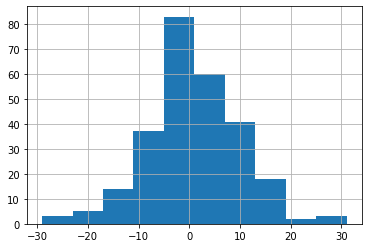

In [20]:
sf['abs_rank_dif'] = sf['abs_rank'] - sf['next_abs_rank']
sf['abs_rank_dif'].hist();

# prediction

In [21]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            350 non-null    object 
 1   name            350 non-null    object 
 2   pob             350 non-null    object 
 3   birthdate       350 non-null    object 
 4   height          350 non-null    float64
 5   weight          350 non-null    float64
 6   year            350 non-null    int64  
 7   month           350 non-null    int64  
 8   win             350 non-null    int64  
 9   loss            350 non-null    int64  
 10  absent          350 non-null    int64  
 11  next_rank       266 non-null    object 
 12  is_east         350 non-null    bool   
 13  next_is_east    266 non-null    object 
 14  tier_rank       350 non-null    int64  
 15  next_tier_rank  266 non-null    float64
 16  num_rank        350 non-null    float64
 17  next_num_rank   266 non-null    flo

In [22]:
sf.to_csv('predict_tables.csv')

In [23]:
cols = ['win', 'loss', 'absent', 'abs_rank', 'next_abs_rank']
sf[cols]

,win,loss,absent,abs_rank,next_abs_rank
0,1,3,11,1.0,1.0
1,1,4,10,2.0,2.0
2,11,4,0,3.0,3.0
3,10,5,0,5.0,4.0
4,13,2,0,16.0,5.0
...,...,...,...,...,...
345,9,6,0,66.0,NaN
346,9,6,0,67.0,NaN
347,3,12,0,68.0,NaN
348,0,15,0,69.0,NaN


In [24]:
x_cols = ['win', 'loss', 'absent', 'abs_rank']
y_cols = ['next_abs_rank']
X = sf.dropna()[x_cols]
y = sf.dropna()[y_cols]
reg = LinearRegression()
reg.fit(X,y)
reg.score(X,y)

0.9429214201112075

In [25]:
x_cols = ['win', 'loss', 'absent', 'abs_rank', 'tier_rank']
y_cols = ['next_abs_rank']
X = sf.dropna()[x_cols]
y = sf.dropna()[y_cols]
reg = LinearRegression()
reg.fit(X,y)
reg.score(X,y)

0.9430932319580391

In [26]:
x_cols = ['win', 'loss', 'absent', 'abs_rank', 'tier_rank', 'is_east']
y_cols = ['next_abs_rank']
X = sf.dropna()[x_cols]
y = sf.dropna()[y_cols]
reg = LinearRegression()
reg.fit(X,y)
reg.score(X,y)

s = pickle.dump(reg, 'lin_reg')

TypeError: file must have a 'write' attribute

In [ ]:
sf[['abs_rank', 'next_abs_rank']].plot.scatter(x = 'abs_rank', y='next_abs_rank')

In [ ]:
kwargs =  {
    'x': 'abs_rank',
    'y': 'next_abs_rank',
    'hue': 'tier_rank',
    'data': sf
}

sns.scatterplot(**kwargs);

In [ ]:
kwargs =  {
    'x': 'abs_rank',
    'y': 'next_abs_rank',
    'hue': 'win',
    'data': sf
}

sns.scatterplot(**kwargs);

In [ ]:
kwargs =  {
    'x': 'abs_rank',
    'y': 'next_abs_rank',
    'hue': 'is_east',
    'data': sf
}

sns.scatterplot(**kwargs);